In [69]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
from sklearn.utils import resample

In [70]:
#bootstrapping function
def bootstrapping(data, sample_size, iterations):
    avgs = []
    for i in range(0,iterations):
        boot = resample(list(data), replace=True, n_samples=sample_size, random_state=i)
        avgs.append(np.mean(boot))
    return np.std(avgs)

#compute standard error for each feature
def get_standard_errors(data):
    error=[]
    for row in data.itertuples():
        error.append(bootstrapping(row.list_coefficients, 10, 1000))
    return error


def plot_bars(data, labels, errors, colors, output_file):
    fig, ax = plt.subplots(figsize=(10,8))
    y_pos = np.arange(len(data))
    ax.barh(y_pos, data, align='center', xerr=errors, color = my_pal)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=24)
    plt.axvline(x= 0, color = 'k')
    ax.grid(False)
    plt.box(False)
#     plt.savefig(output_file, bbox_inches='tight', dpi=1200)
    return ax


<h1>Features importance survival</h1>

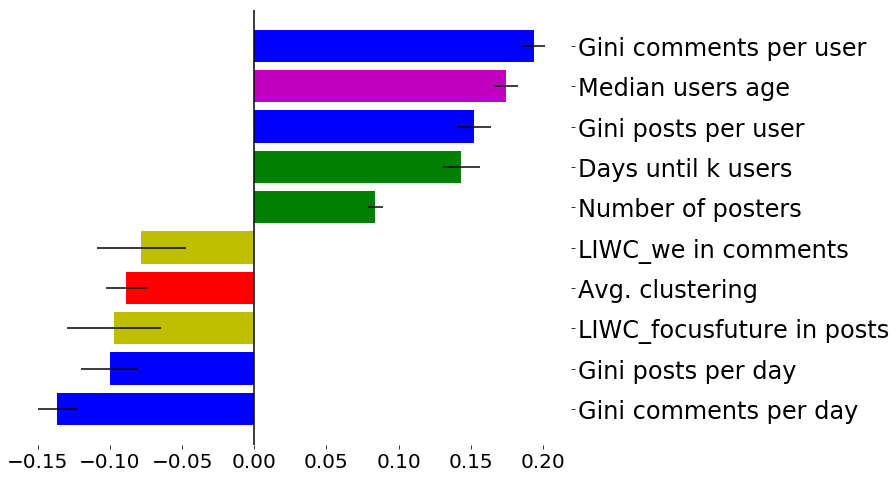

In [71]:
#read file
top_features_survival = pd.read_csv('./data/features_importance_survival.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_survival = top_features_survival[top_features_survival.model == 7]
#convert string to tuples
top_features_survival['list_coefficients'] = top_features_survival['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_survival = top_features_survival.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_survival)

features = ['Median users age', 'Gini comments per day', 'Gini comments per user', 'Days until k users', 
            'Gini posts per user', 'LIWC_focusfuture in posts', 'Gini posts per day', 'Avg. clustering',
           'Number of posters', 'LIWC_we in comments']

#create new column
top_features_survival['standard_error'] = errors
#create new column
top_features_survival['feature'] = features

#sort features by coefficient
top_features_survival.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['b', 'b', 'y', 'r', 'y', 'g', 'g', 'b', 'm', 'b']

plot_bars(top_features_survival['avg_coefficient'], top_features_survival['feature'], errors, my_pal, 'top_10_features_survival.pdf')



<h1>Growth Comments</h1>

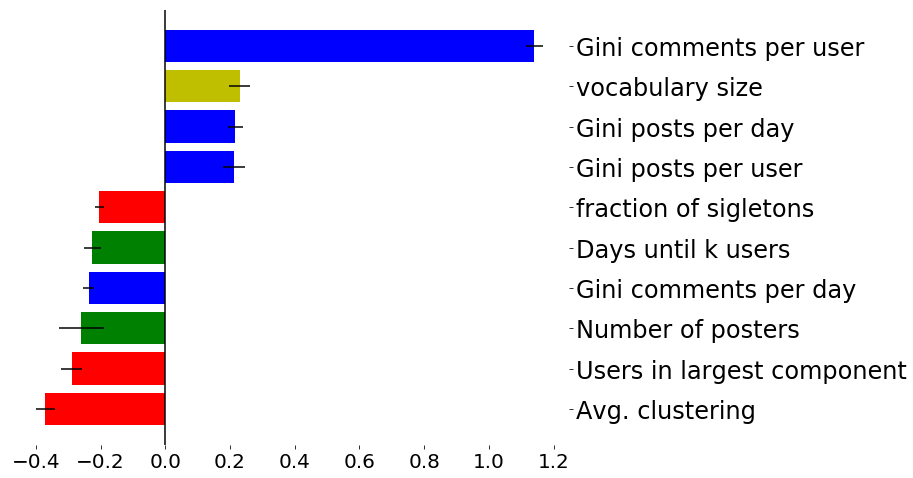

In [72]:
#read file
top_features_g_comments = pd.read_csv('./data/features_importance_growht_1year_comments.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_g_comments = top_features_g_comments[top_features_g_comments.model == 7]
#convert string to tuples
top_features_g_comments['list_coefficients'] = top_features_g_comments['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_g_comments = top_features_g_comments.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_g_comments)

features = ['Gini comments per user', 'Avg. clustering', 'Gini comments per day', 
'Users in largest component', 'vocabulary size', 'Number of posters', 'Gini posts per user',
'Days until k users', 'Gini posts per day', 'fraction of sigletons']

#create new column
top_features_g_comments['standard_error'] = errors
#create new column
top_features_g_comments['feature'] = features

#sort features by coefficient
top_features_g_comments.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['r', 'r', 'g', 'b', 'g', 'r', 'b', 'b', 'y', 'b']

plot_bars(top_features_g_comments['avg_coefficient'], top_features_g_comments['feature'], errors, my_pal, 'top_10_features_g_comments.pdf')



<h1>Growth posts</h1>

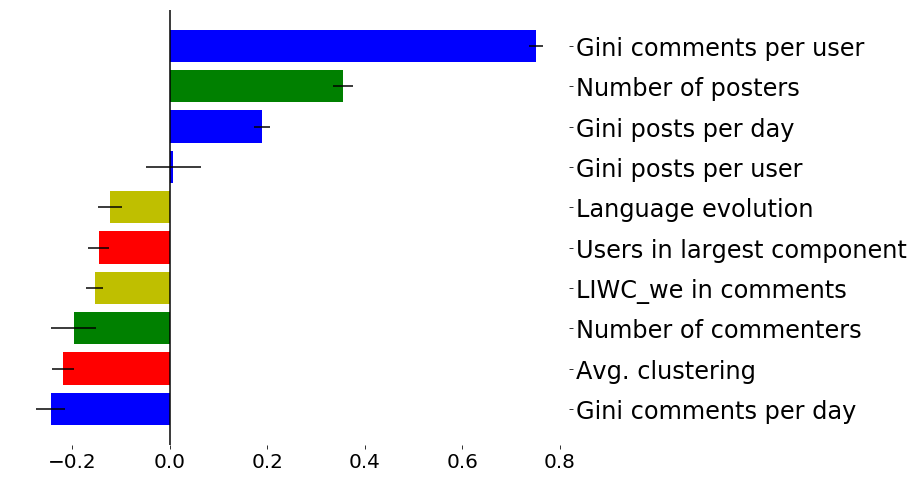

In [73]:
#read file
top_features_g_posts = pd.read_csv('./data/features_importance_growht_1year_posts.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_g_posts = top_features_g_posts[top_features_g_posts.model == 7]
#convert string to tuples
top_features_g_posts['list_coefficients'] = top_features_g_posts['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_g_posts = top_features_g_posts.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_g_posts)

features = ['Gini comments per user', 'Number of posters', 'Gini comments per day','Number of commenters',
            'Avg. clustering','Gini posts per day','Gini posts per user', 
            'Users in largest component','LIWC_we in comments', 'Language evolution']


#create new column
top_features_g_posts['standard_error'] = errors
#create new column
top_features_g_posts['feature'] = features

#sort features by coefficient
top_features_g_posts.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['b', 'r', 'g', 'y', 'r', 'y', 'b', 'b', 'g', 'b']

plot_bars(top_features_g_posts['avg_coefficient'], top_features_g_posts['feature'], errors, my_pal, 'top_10_features_g_posts.pdf')



<h1>Retention</h1>

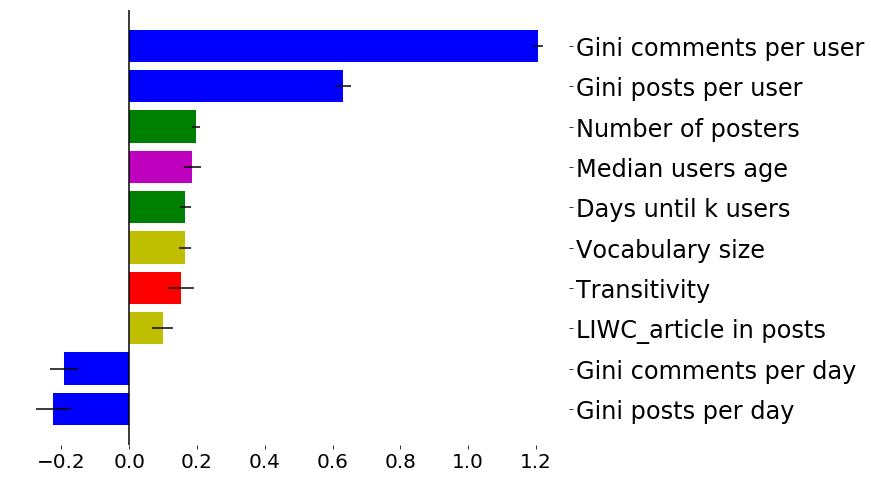

In [74]:
#read file
top_features_g_retention = pd.read_csv('./data/features_importance_retention.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_g_retention = top_features_g_retention[top_features_g_retention.model == 7]
#convert string to tuples
top_features_g_retention['list_coefficients'] = top_features_g_retention['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_g_retention = top_features_g_retention.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_g_retention)

features = ['Gini comments per user', 'Gini posts per user', 'Gini comments per day', 'Gini posts per day',
'Number of posters', 'Median users age', 'Transitivity', 'Days until k users', 'Vocabulary size', 'LIWC_article in posts'] 

#create new column
top_features_g_retention['standard_error'] = errors
#create new column
top_features_g_retention['feature'] = features

#sort features by coefficient
top_features_g_retention.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['b', 'b', 'y', 'r', 'y', 'g', 'm', 'g', 'b', 'b']

plot_bars(top_features_g_retention['avg_coefficient'], top_features_g_retention['feature'], errors, my_pal, 'top_10_features_retention.pdf')



<h1>Avg comments</h1>

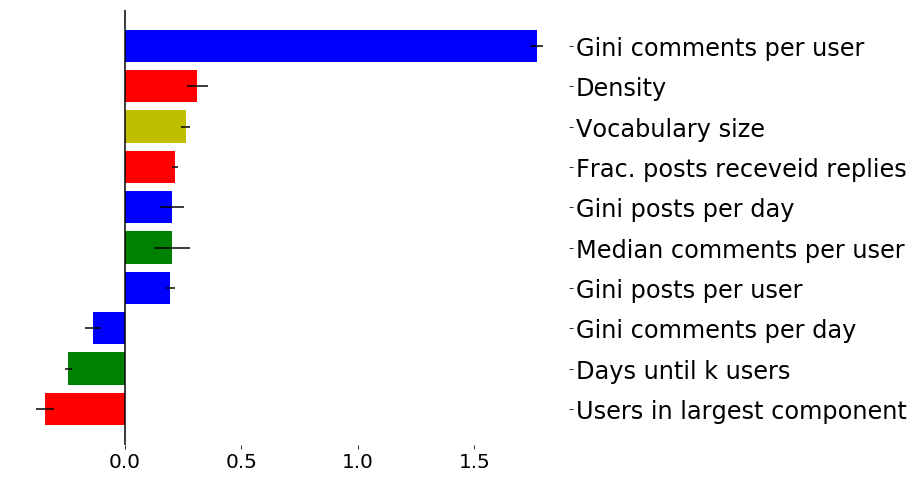

In [75]:
#read file
top_features_g_retention = pd.read_csv('./data/features_importance_avg_comments.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_g_retention = top_features_g_retention[top_features_g_retention.model == 7]
#convert string to tuples
top_features_g_retention['list_coefficients'] = top_features_g_retention['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_g_retention = top_features_g_retention.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_g_retention)

features = ['Gini comments per user', 'Users in largest component', 'Density', 'Vocabulary size', 
            'Gini comments per day', 'Gini posts per user', 'Days until k users', 
            'Frac. posts receveid replies', 'Gini posts per day', 'Median comments per user']

#create new column
top_features_g_retention['standard_error'] = errors
#create new column
top_features_g_retention['feature'] = features

#sort features by coefficient
top_features_g_retention.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['r', 'g', 'b', 'b', 'g', 'b', 'r', 'y', 'r', 'b']

ax = plot_bars(top_features_g_retention['avg_coefficient'], top_features_g_retention['feature'], errors, my_pal, 'top_10_features_avg_comments.pdf')
# ax.set_xlim([-0.4, 1.85])


<h1>Avg posts</h1>

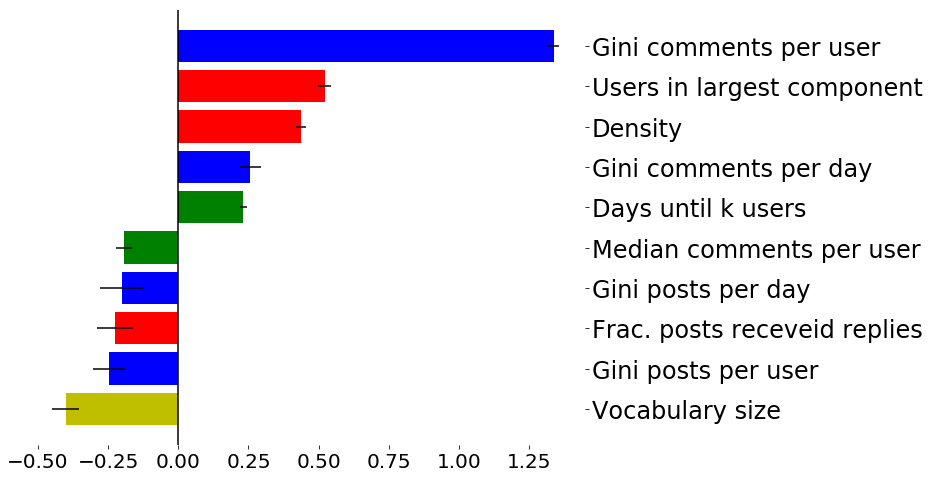

In [76]:
#read file
top_features_g_retention = pd.read_csv('./data/features_importance_avg_posts.csv', sep= ',', lineterminator='\n')
#select model 7
top_features_g_retention = top_features_g_retention[top_features_g_retention.model == 7]
#convert string to tuples
top_features_g_retention['list_coefficients'] = top_features_g_retention['list_coefficients'].apply(literal_eval)
#keep only the top 10 features
top_features_g_retention = top_features_g_retention.head(10)

#compute standard error for each feature
errors = get_standard_errors(top_features_g_retention)

features = ['Gini comments per user', 'Users in largest component', 'Density', 'Vocabulary size', 
            'Gini comments per day', 'Gini posts per user', 'Days until k users', 
            'Frac. posts receveid replies', 'Gini posts per day', 'Median comments per user']

#create new column
top_features_g_retention['standard_error'] = errors
#create new column
top_features_g_retention['feature'] = features

#sort features by coefficient
top_features_g_retention.sort_values('avg_coefficient', inplace=True)

#colors from the models the features came from
my_pal = ['y', 'b', 'r', 'b', 'g', 'g', 'b', 'r', 'r', 'b']

plot_bars(top_features_g_retention['avg_coefficient'], top_features_g_retention['feature'], errors, my_pal, 'top_10_features_avg_posts.pdf')
